#### Goals 
- Understand Hierarchical clustering
- Analyze competitors cars before market launch
- Learn cleaning, visualization, other library use along the way

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# First, I will try with random inbuilt values 
# Then with actual dataset
from sklearn.datasets._samples_generator import make_blobs
x, y = make_blobs(n_samples=50, centers=[[5, 5], [-2, -3], [1, 1], [10, 5]], cluster_std=0.9)
print(x[0:5])
# print(x[:,1])
print(x[0:5,:1])
x.dtype

[[-1.90116125 -3.00117702]
 [ 5.56527622  4.65176631]
 [-1.52956823 -2.60944292]
 [-1.13109916 -2.54907362]
 [ 1.55214142  2.07347213]]
[[-1.90116125]
 [ 5.56527622]
 [-1.52956823]
 [-1.13109916]
 [ 1.55214142]]


dtype('float64')

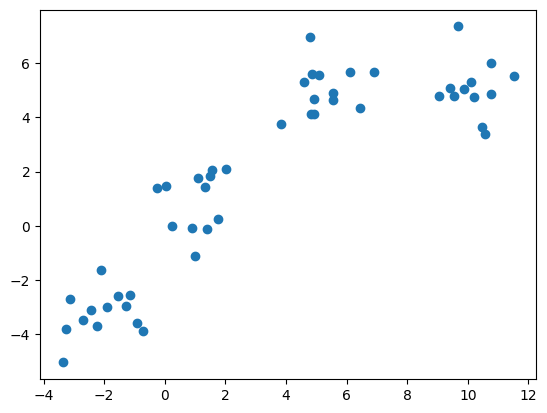

In [26]:
# Scatter plot of the data
plt.scatter(x[:, 0], x[:, 1], marker='o')

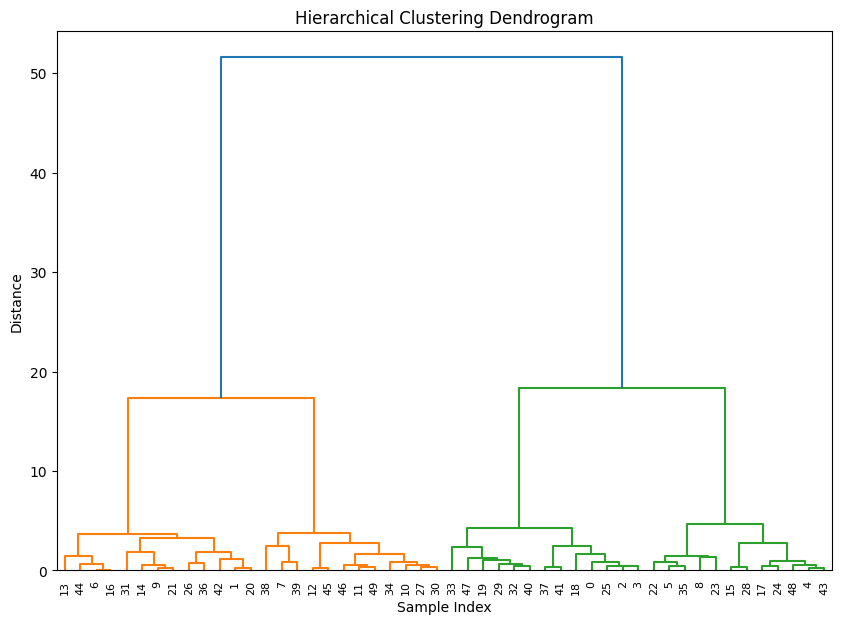

In [37]:
# Dendogram plot
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(x, method="ward")
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


In [27]:
# Implementing agglomerative algorithm
from sklearn.cluster import AgglomerativeClustering
aggl = AgglomerativeClustering(n_clusters=4, linkage="average")

In [34]:
labels = aggl.fit_predict(x)

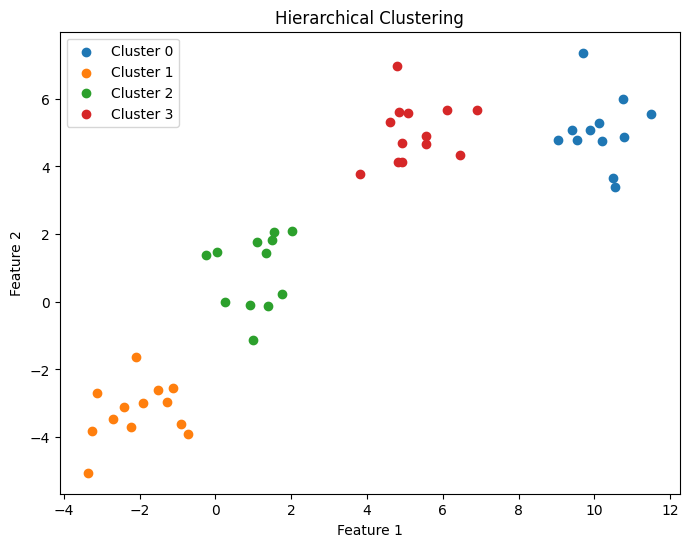

In [36]:
# Plotting the predicted graph for the data

# Figure size 8 inches by 6 inches
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(x[labels == label, 0], x[labels == label, 1], label=f"Cluster {label}")
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [41]:
# Loading the datasets
car_df = pd.read_csv("./datasets/cars_clus.csv")
car_df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [49]:
# print(car_df.describe())
# print(car_df.shape)
# print(car_df.info())
print(car_df.dtypes)

manufact      object
model         object
sales         object
resale        object
type          object
price         object
engine_s      object
horsepow      object
wheelbas      object
width         object
length        object
curb_wgt      object
fuel_cap      object
mpg           object
lnsales       object
partition    float64
dtype: object


In [ ]:
# Brainstorming over data
# All columns looks important
# 